Mount the google drive to create a valid path the dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


DATASET

In [2]:
import os
import numpy as np
import random

try:  
  project_fname = '/content/drive/My Drive/EEG/'
  os.chdir(project_fname)
  project_data_file = os.path.join(project_fname,'project_data/')
except FileNotFoundError: 
  project_fname = '/content/drive/My Drive/Colab Notebooks/EEG'
  os.chdir(project_fname)
  project_data_file = os.path.join(project_fname,'project_data/')

from load_data import * 
from data_preprocessing import * 
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import preprocessing

X_test, y_test, person_train_valid, X_train_valid, y_train_valid, person_test = load_data(dir_path = project_data_file)

# normalize the data
N_trials,N_eeg,N_bins,_ = X_train_valid.shape
#X_train_valid = np.reshape(preprocessing.scale(np.reshape(X_train_valid,(N_trials*N_eeg,N_bins)),axis=1),(N_trials,N_eeg,N_bins,1))
N_trials,N_eeg,N_bins,_ = X_test.shape
#X_test = np.reshape(preprocessing.scale(np.reshape(X_test,(N_trials*N_eeg,N_bins)),axis=1),(N_trials,N_eeg,N_bins,1))

num_test_samples = X_test.shape[0]
print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))

Training/Valid data shape: (2115, 22, 1000, 1)
Test data shape: (443, 22, 1000, 1)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


Data Augumentation

In [ ]:
sample_every = 4
num_samples_per_trial = sample_every
X_train_valid_subsample, y_train_valid_subsample = shuffle_data(*subsample_data(X_train_valid, y_train_valid,sample_every=sample_every))
X_test_subsample, y_test_subsample = subsample_data(X_test, y_test,sample_every=sample_every)

In [ ]:
X_train_valid_person = [X_train_valid[person_train_valid.flatten()==i] for i in range(9)]
y_train_valid_person = [y_train_valid[person_train_valid.flatten()==i] for i in range(9)]
person_train_valid_person = [person_train_valid[person_train_valid.flatten()==i] for i in range(9)]

X_test_person = [X_test[person_test.flatten()==i] for i in range(9)]
y_test_person = [y_test[person_test.flatten()==i] for i in range(9)]
person_test_person = [person_test[person_test.flatten()==i] for i in range(9)]

In [3]:

N,eeg,time,_ = X_train_valid.shape
sample_len=534
stride=50
num_crops = 10
num_samples_per_trial = int((1000-sample_len)/stride + 1)
num_samples = int(N*((1000-sample_len)/stride + 1))
X_train_valid_crop, y_train_valid_crop, person_train_valid_crop = crop_data_sequentially(X_train_valid,y_train_valid,person_train_valid,sample_len=sample_len,stride=stride)
X_test_crop, y_test_crop, person_test_crop = crop_data_sequentially(X_test,y_test,person_test,sample_len=sample_len,stride=stride)

del X_train_valid
del X_test
#shuffle the data
cv_idx=np.arange(X_train_valid_crop.shape[0])
np.random.shuffle(cv_idx)
X_train_valid_crop=X_train_valid_crop[cv_idx]
y_train_valid_crop=y_train_valid_crop[cv_idx]
person_train_valid_crop = person_train_valid_crop[cv_idx]

print('Training/Valid Cropped data shape: {}'.format(X_train_valid_crop.shape))
print('Training/Valid Cropped target shape: {}'.format(y_train_valid_crop.shape))
print('Training/Valid Cropped person shape: {}'.format(person_train_valid_crop.shape))
print('Test Cropped data shape: {}'.format(X_test_crop.shape))
print('Test Cropped target shape: {}'.format(y_test_crop.shape))
print('Test Cropped person shape: {}'.format(person_test_crop.shape))



Training/Valid Cropped data shape: (21826, 22, 534, 1)
Training/Valid Cropped target shape: (21826,)
Training/Valid Cropped person shape: (21826,)
Test Cropped data shape: (4571, 22, 534, 1)
Test Cropped target shape: (4571,)
Test Cropped person shape: (4571,)


In [4]:
X_train_valid_crop_person = [X_train_valid_crop[person_train_valid_crop==i] for i in range(9)]
y_train_valid_crop_person = [y_train_valid_crop[person_train_valid_crop==i] for i in range(9)]
person_train_valid_crop_person = [person_train_valid_crop[person_train_valid_crop==i] for i in range(9)]

X_test_crop_person =[X_test_crop[person_test_crop==i] for i in range(9)]
y_test_crop_person = [y_test_crop[person_test_crop==i] for i in range(9)]
person_test_crop_person = [person_test_crop[person_test_crop==i] for i in range(9)]

'''
del X_train_valid_crop
del X_test_crop
'''

print(X_train_valid_crop_person[0].shape)
print(y_train_valid_crop_person[0].shape)
print(person_train_valid_crop_person[0].shape)
print(X_test_crop_person[0].shape)
print(y_test_crop_person[0].shape)
print(person_test_crop_person[0].shape)

(3046, 22, 534, 1)
(3046,)
(3046,)
(641, 22, 534, 1)
(641,)
(641,)


In [5]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

TensorFlow 2.x selected.
Tensorflow version 2.1.0
Running on TPU  ['10.8.43.170:8470']
INFO:tensorflow:Initializing the TPU system: 10.8.43.170:8470


INFO:tensorflow:Initializing the TPU system: 10.8.43.170:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Input,Dense,Conv2D,ReLU,ELU,\
  Activation,Flatten,AveragePooling2D,Softmax,BatchNormalization,MaxPooling2D,\
  Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,\
  ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
from datetime import datetime


CNN

In [ ]:
def create_model():
  model = Sequential()
  model.add(Conv2D(filters=40,
                   kernel_size=(1,25),
                   data_format='channels_last',
                   kernel_regularizer=regularizers.l2(0.001),
                   input_shape=(22,534,1))) #(22,510,40)
  model.add(BatchNormalization(axis=-1))
  model.add(Dropout(rate=0.5))
  model.add(Conv2D(filters=40,
                  data_format='channels_last',
                  kernel_size=(22,1),
                  kernel_regularizer=regularizers.l2(0.001))) #(1,510,40)
  model.add(BatchNormalization(axis=-1))
  model.add(Activation(K.square,name='Square'))
  model.add(AveragePooling2D(pool_size=(1,75),strides=(1,15)))#(1,30,40)
  model.add(Activation(K.log,name='Log'))
  model.add(Flatten())
  model.add(Dense(100,
                  kernel_regularizer=regularizers.l2(0.001),
                  activation='relu'))
  model.add(Dense(num_classes,
                  activation='softmax'))
  return model

#initialize hyperparameters
rand_seed = int(datetime.strftime(datetime.now(),"%Y%m%d%H%M%S"))
batch_size=32
num_folds=5
num_classes = 4

In [ ]:


#lr = 9e-4

rates = [4e-3,5e-3,5e-3,2e-3,7e-3,9e-4,8e-3,7e-4,1e-3]
#Person Acc [0.72, 0.64, 0.78, 0.6, 0.48936170212765956, 0.46938775510204084, 0.66, 0.72, 0.7021276595744681]
#Person Acc [0.7, 0.54, 0.74, 0.62, 0.44680851063829785, 0.3673469387755102, 0.62, 0.62, 0.6808510638297872]
#Person Acc [0.78, 0.6, 0.74, 0.6, 0.6382978723404256, 0.4489795918367347, 0.74, 0.64, 0.6808510638297872]
#person acc [0.72, 0.56, 0.78, 0.6, 0.5319148936170213, 0.4489795918367347, 0.72, 0.72, 0.6808510638297872]
#Person Acc [0.74, 0.3, 0.76, 0.6, 0.46808510638297873, 0.46938775510204084, 0.7, 0.58, 0.6808510638297872]
#Person Acc [0.66, 0.6, 0.68, 0.62, 0.6170212765957447, 0.46938775510204084, 0.6, 0.78, 0.6595744680851063] rates = [5e-3,7e-3,5e-3,2e-3,7e-3,5e-4,8e-3,7e-4,1e-3]
#Person Acc [0.66, 0.56, 0.88, 0.58, 0.2978723404255319, 0.5306122448979592, 0.84, 0.78, 0.574468085106383] rates = [5e-3,7e-3,5e-3,2e-3,7e-3,6e-4,8e-3,7e-4,1e-3]
#Person Acc [0.5, 0.28, 0.86, 0.4, 0.723404255319149, 0.4489795918367347, 0.58, 0.78, 0.7021276595744681]   rates = [5e-3,7e-3,5e-3,2e-3,7e-3,6e-4,8e-3,7e-4,1e-3] changed stride to 25
#Person Acc [0.74, 0.54, 0.76, 0.64, 0.6170212765957447, 0.42857142857142855, 0.82, 0.78, 0.6808510638297872] rates = [4e-3,8e-3,5e-3,2e-3,7e-3,7e-4,8e-3,7e-4,1e-3]
# Person Acc [0.8, 0.4, 0.74, 0.68, 0.6808510638297872, 0.46938775510204084, 0.62, 0.64, 0.6808510638297872] rates = [4e-3,8e-3,5e-3,2e-3,7e-3,7e-4,8e-3,7e-4,1e-3] initialzation to he normal
#Person Acc [0.68, 0.4, 0.76, 0.66, 0.6595744680851063, 0.4489795918367347, 0.78, 0.78, 0.6382978723404256] rates = [4e-3,9e-3,5e-3,2e-3,7e-3,8e-4,8e-3,7e-4,1e-3]
#[0.78,0.6,0.88,0.68,0.72,0.53,0.84,0.78,0.70]
#current avg of best test acc: 0.72
try:
  del model
  K.clear_session()
except:
  pass
print('BATCH SIZE: {}'.format(batch_size))
models = []
person_accuracies = []
avg_test_acc = np.zeros(9)
lr_plateau = ReduceLROnPlateau(patience=4)
early_stopper = EarlyStopping(patience=10)

for person in range(9):

  print('PERSON: {}'.format(person))
  print('LEARNING RATE: {}'.format(rates[person]))

  models.append(create_model())
  optimizer = Adam(lr=rates[person])
  
  
  
  #optimizer = SGD(lr=lr, momentum=0.9,decay=1e-6)
  models[person].compile(loss=categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])
  #train model
  
  history = models[person].fit(x=X_train_valid_crop_person[person], y=to_categorical(y_train_valid_crop_person[person]), 
                      batch_size=batch_size, epochs=30, 
                      validation_split=1/num_folds,
                      callbacks=[early_stopper, lr_plateau])

  # Plot training & validation accuracy values
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  correct = 0
  N,_,_,_ = X_test_crop_person[person].shape
  scores = np.zeros(num_classes)
  test_data = X_test_crop_person[person]
  test_label = y_test_crop_person[person]
  for i in range(int(N/num_samples_per_trial)):
    strt_idx = i*num_samples_per_trial
    test_batch = test_data[strt_idx:strt_idx+num_samples_per_trial]
    scores = np.mean(models[person].predict_on_batch(x=test_batch),axis=0)
    pred = np.argmax(scores)
    if pred == test_label[strt_idx]:
          correct += 1
  test_acc = correct/(N/num_samples_per_trial)
  print('Test accuracy: {}'.format(test_acc))
  person_accuracies.append(test_acc)

print('Person Acc {}'.format(person_accuracies))
print('Test Avg Mean Acc :{}'.format(np.mean(person_accuracies)))

In [ ]:
person_accuracies = []
avg_test_acc = np.zeros(9)

for person in range(9):
  correct = 0
  N,_,_,_ = X_test_crop_person[person].shape
  scores = np.zeros(num_classes)
  test_data = X_test_crop_person[person]
  test_label = y_test_crop_person[person]

  for i in range(int(N/num_samples_per_trial)):
    strt_idx = i*num_samples_per_trial
    test_batch = test_data[strt_idx:strt_idx+num_samples_per_trial]
    scores = np.mean(model.predict_on_batch(x=test_batch),axis=0)
    pred = np.argmax(scores)
    if pred == test_label[strt_idx]:
          correct += 1
  test_acc = correct/(N/num_samples_per_trial)
  print('Test accuracy: {}'.format(test_acc))
  person_accuracies.append(test_acc)

print('Person Acc {}'.format(person_accuracies))
print('Test Avg Mean Acc :{}'.format(np.mean(person_accuracies)))

In [ ]:
#model ensembling: train multiple models and average their predictions on entire test set
#test_avg_ensembling  = 0.42 when each model trained to one person
#try training multiple modesl on entire dataset and then ensembling together
avg_test_ensemble = []
correct=0
test_data=X_test_crop
test_label=y_test_crop

for i in range(3):
  strt_idx = i*num_samples_per_trial
  scores = np.zeros((num_classes))
  test_batch = test_data[strt_idx:strt_idx+num_samples_per_trial]
  for person in range(9):
    model_ensemble = models[person]
    score=np.zeros(4)
    score += np.mean(model_ensemble.predict_on_batch(x=test_batch),axis=0)
    scores+=score
    print(score)
  pred = np.argmax(scores)
  if pred == test_label[strt_idx]:
    correct += 1

print('Test_acc_avg_ensemble: {}'.format(correct/(N/num_samples_per_trial)))

In [ ]:
#reset model variable to train another one
try:
  del model
  K.clear_session()
except:
  pass
  
model = create_model()
optimizer = Adam(lr=2e-3)

model.compile(loss=categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])
plot_model(model,'cnn_baseline.png',show_shapes=True)

In [ ]:
#introduced l1 regularization to spatial convolution lr=1e-3
#Test acc per person: [0.62       0.34       0.78       0.46       0.46808511 0.46938776 0.74       0.8        0.74468085] Avg test acc: 0.6024615236165389
#raise lr to 2e-3 set ReduceLROnPlateau patience to 2
#Test acc per person: [0.58       0.46       0.82       0.58       0.46808511 0.3877551 0.66       0.72       0.63829787] Avg test acc: 0.59045978675158
#removed l1 regularization
#Test acc per person: [0.6        0.48       0.82       0.6        0.40425532 0.53061224 0.76       0.84       0.65957447] Avg test acc: 0.6327157813480002
#Adam lr=9e-4 l2 reg=0.01
#Test acc per person: [0.64       0.42       0.72       0.54       0.4893617  0.46938776 0.64       0.7        0.74468085] Avg test acc: 0.5959367009215034
#changed sample len to 534 to perfectly mimic paper changed lr plateau patience to 3
#Test acc per person: [0.71762871 0.44       0.88       0.54       0.40425532 0.51020408 0.56       0.68       0.65957447]Avg test acc: 0.599073619334989
#added relu layer in between conv layers Test acc per person: [0.65522621 0.34       0.66       0.52       0.5106383  0.36734694 0.52       0.7        0.57446809] Avg test acc: 0.5386310589780661
#removed relu added dense layer Test acc per person: [0.74882995 0.32       0.7        0.54       0.42553191 0.42857143 0.56       0.74       0.72340426]Avg test acc: 0.5762597279980359
#used sgd at lr=1e-2 Test acc per person: [0.73322933 0.24       0.76       0.48       0.4893617  0.40816327 0.68       0.66       0.68085106] Avg test acc: 0.5701783733818595
#switched back to adam removed dense layer and set lr=3e-3 Test acc per person: [0.74882995 0.38       0.72       0.52       0.38297872 0.44897959 0.56       0.62       0.70212766] Avg test acc: 0.5647684364459541
#lecun_normal initialization Test acc per person: [0.74882995 0.38       0.72       0.52       0.38297872 0.44897959 0.56       0.62       0.70212766] Avg test acc: 0.5647684364459541
#went for 80 epochs Test acc per person: [0.81123245 0.46       0.8        0.62       0.4893617  0.51020408 0.7        0.78       0.72340426] Avg test acc: 0.6549113875974927
#changed l2 reg to 0.001 added dense layer Test acc per person: [0.73322933 0.68       0.84       0.58       0.4893617  0.53061224 0.74       0.78       0.76595745] Avg test acc: 0.6821289692230329
#changed relu in dense layer to elu Test acc per person: [0.71762871 0.46       0.9        0.5        0.36170213 0.44897959 0.76       0.84       0.78723404] Avg test acc: 0.6417271630219674
#changed back to relu and added batch norm layer after dense Test acc per person: [0.74882995 0.52       0.82       0.62       0.53191489 0.53061224 0.82       0.74       0.76595745] Avg test acc: 0.6774793931690688
#removed added batch norm added temporal conv layer (took too long to train so colab just stopped)
#changed batch size to 64 Test acc per person: [0.71762871 0.52       0.78       0.58       0.5106383  0.44897959 0.74       0.8        0.80851064] Avg test acc: 0.6561952481283504
#change initialization to lecun normal Test acc per person: [0.74882995 0.5        0.82       0.56       0.53191489 0.48979592  0.76       0.86       0.80851064] Avg test acc: 0.6754501559422632
#added relu after first conv layer Test acc per person: [0.68642746 0.44       0.78       0.68       0.4893617  0.48979592 0.64       0.72       0.68085106] Avg test acc: 0.6229373490470087 BUT 72% VAL ACCURACY
#train on uncropped data Test acc per person: [0.6        0.42       0.74       0.62       0.72340426 0.44897959 0.6        0.64       0.59574468] Avg test acc: 0.5986809475563274
#removed relu at first dense layer Test acc per person: [0.60842434 0.52       0.78       0.54       0.5106383  0.51020408 0.54       0.68       0.63829787] Avg test acc: 0.5919516209798776 | 77% VAL ACCURACY
#changed num filters in first conv layer to 45 and reg to 0.001Test acc per person: [0.60842434 0.44       0.7        0.54       0.46808511 0.40816327 0.68       0.62       0.59574468] Avg test acc: 0.5622685988348493
#removed relu at first conv layer and set reg to 0.001 Test acc per person: [0.703125   0.52       0.78       0.74       0.46808511 0.51020408 0.66       0.76       0.72340426] Avg test acc: 0.6516464937038645
#changed num filters to 35 Test acc per person: [0.66       0.44       0.72       0.58       0.53191489 0.40816327 0.78       0.7        0.63829787] Avg test acc: 0.6064862256959521
#change num filters back to 40 and made hidden layer 120 instead of 100 Test acc per person: [0.62       0.6        0.76       0.64       0.53191489 0.48979592 0.64       0.72       0.72340426] Avg test acc: 0.6361238963670576

#train model
batch_size=128
lr_plateau = ReduceLROnPlateau(patience=4)
early_stopper = EarlyStopping(patience=20)

model_check_fname = os.path.join(project_fname,'model_checkpoints/','ckpt-CNN')
time_rn = (datetime.strftime(datetime.now(),"%H_%M_%S_%d_%m_%Y"))
model_filename = os.path.join(model_check_fname,'model_{}.h5'.format(time_rn))

try:
  history = model.fit(x=X_train_valid_crop, y=to_categorical(y_train_valid_crop), 
                      batch_size=batch_size, epochs=200, 
                      validation_split=1/num_folds,
                      callbacks=[lr_plateau,early_stopper])
except KeyboardInterrupt:
  print('Keyboard Interrupted!')
except Exception as e:
  print('Unknown error: {}'.format(e))
finally:
  print('Saving model to {}'.format(model_filename))
  model.save(model_filename)



# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [9]:
X_test_crop_person = [X_test_crop[person_test_crop.flatten()==i] for i in range(9)]
y_test_crop_person = [y_test_crop[person_test_crop.flatten()==i] for i in range(9)]
model_check_fname = os.path.join(project_fname,'model_checkpoints/','ckpt-CNN')
model = load_model(os.path.join(model_check_fname,'model_18_00_20_10_03_2020_68%.h5'),
                   custom_objects={'square':K.square,'log':K.log})

person_acc = np.zeros(9)
preds = np.empty((0))
labels = np.empty((0))

for person in range(9):
  correct = 0
  N,_,_,_ = X_test_crop_person[person].shape
  scores = np.zeros(num_classes)
  test_data = X_test_crop_person[person]
  test_label = y_test_crop_person[person]
  for i in range(int(N/num_samples_per_trial)):
    strt_idx = i*num_samples_per_trial
    test_batch = test_data[strt_idx:strt_idx+num_samples_per_trial]
    raw_scores = model.predict_on_batch(x=test_batch)
    scores = np.mean(raw_scores,axis=0)
    pred = np.argmax(scores)

    assert all(y == test_label[strt_idx] for y in test_label[strt_idx:strt_idx+num_samples_per_trial])
    preds = np.append(preds,pred)
    labels = np.append(labels,test_label[strt_idx])
    if pred == test_label[strt_idx]:
          correct += 1
  test_acc = correct/(i+1)
  person_acc[person]=test_acc
print('Test acc per person: {}'.format(person_acc))
print('Avg test acc: {}'.format(np.mean(person_acc)))

Test acc per person: [0.734375   0.68       0.84       0.58       0.4893617  0.53061224
 0.74       0.78       0.76595745]
Avg test acc: 0.6822562659815699


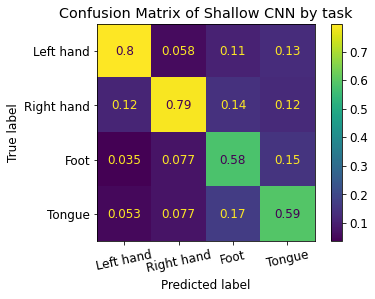

In [13]:
display_labels = ['Left hand', 'Right hand','Foot','Tongue']
confusion = confusion_matrix(y_true=labels, y_pred=preds, normalize='pred')
disp = ConfusionMatrixDisplay(confusion_matrix=confusion,
                              display_labels=display_labels)
disp.plot()
disp.ax_.set_xticklabels(display_labels, rotation=12)
plt.title('Confusion Matrix of Shallow CNN by task')

plt.savefig('CNN_confusionmatrix.png')
plt.show()

In [ ]:
person_acc = np.zeros(9)

for person in range(9):
  correct = 0
  N,_,_,_ = X_test_person[person].shape
  scores = np.zeros(num_classes)
  test_data = X_test_person[person]
  test_label = y_test_person[person]
  scores = model.predict_on_batch(x=test_data)
  pred = np.argmax(scores,axis=1)
  correct = np.sum(pred == test_label)
  test_acc = correct/(N)
  person_acc[person]=test_acc
print('Test acc per person: {}'.format(person_acc))
print('Avg test acc: {}'.format(np.mean(person_acc)))

In [ ]:
try:
  del model
  K.clear_session()
except:
  pass
  
model = create_model()
optimizer = Adam(lr=9e-4)
#optimizer = SGD(lr=1e-3, momentum=0.9,decay=1e-6)
model.compile(loss=categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])

In [ ]:
#train on subsampled data
batch_size=32
lr_plateau = ReduceLROnPlateau(patience=3)
early_stopper = EarlyStopping(patience=8)
history = model.fit(x=X_train_valid_subsample, y=to_categorical(y_train_valid_subsample), 
                    batch_size=batch_size, epochs=10, 
                    validation_split=1/num_folds,
                    callbacks=[early_stopper,lr_plateau])

try:
  model_check_fname = os.path.join(project_fname, 'model_checkpoints/')
  time_rn = (datetime.strftime(datetime.now(),"%H_%M_%S_%d_%m_%Y"))
  model_filename = os.path.join(model_check_fname,'model{}.h5'.format(time_rn))
  print('Saving model weights to {}'.format(model_filename))
  model.save_weights(model_check_fname)
except Exception as e:
  print(e)


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
correct = 0
print('num_samples_per_trial: {}'.format(num_samples_per_trial))
N,_,_,_ = X_test_subsample.shape
scores = np.zeros(num_classes)
test_data = X_test_subsample
test_label = y_test_subsample
for i in range(int(N/num_samples_per_trial)):
  strt_idx = i*num_samples_per_trial
  test_batch = test_data[strt_idx:strt_idx+num_samples_per_trial]
  scores = np.mean(model.predict_on_batch(x=test_batch),axis=0)
  pred = np.argmax(scores)
  if pred == test_label[strt_idx]:
        correct += 1
test_acc = correct/(N/num_samples_per_trial)
print('Test acc: {}'.format(test_acc))

num_samples_per_trial: 4
Test acc: 0.4198645598194131
